# Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
glass_data = pd.read_csv("glass.csv")

In [3]:
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
glass_data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
glass_data.iloc[:,:9] = glass_data.iloc[:,:9].replace(0, np.nan)

In [6]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 150

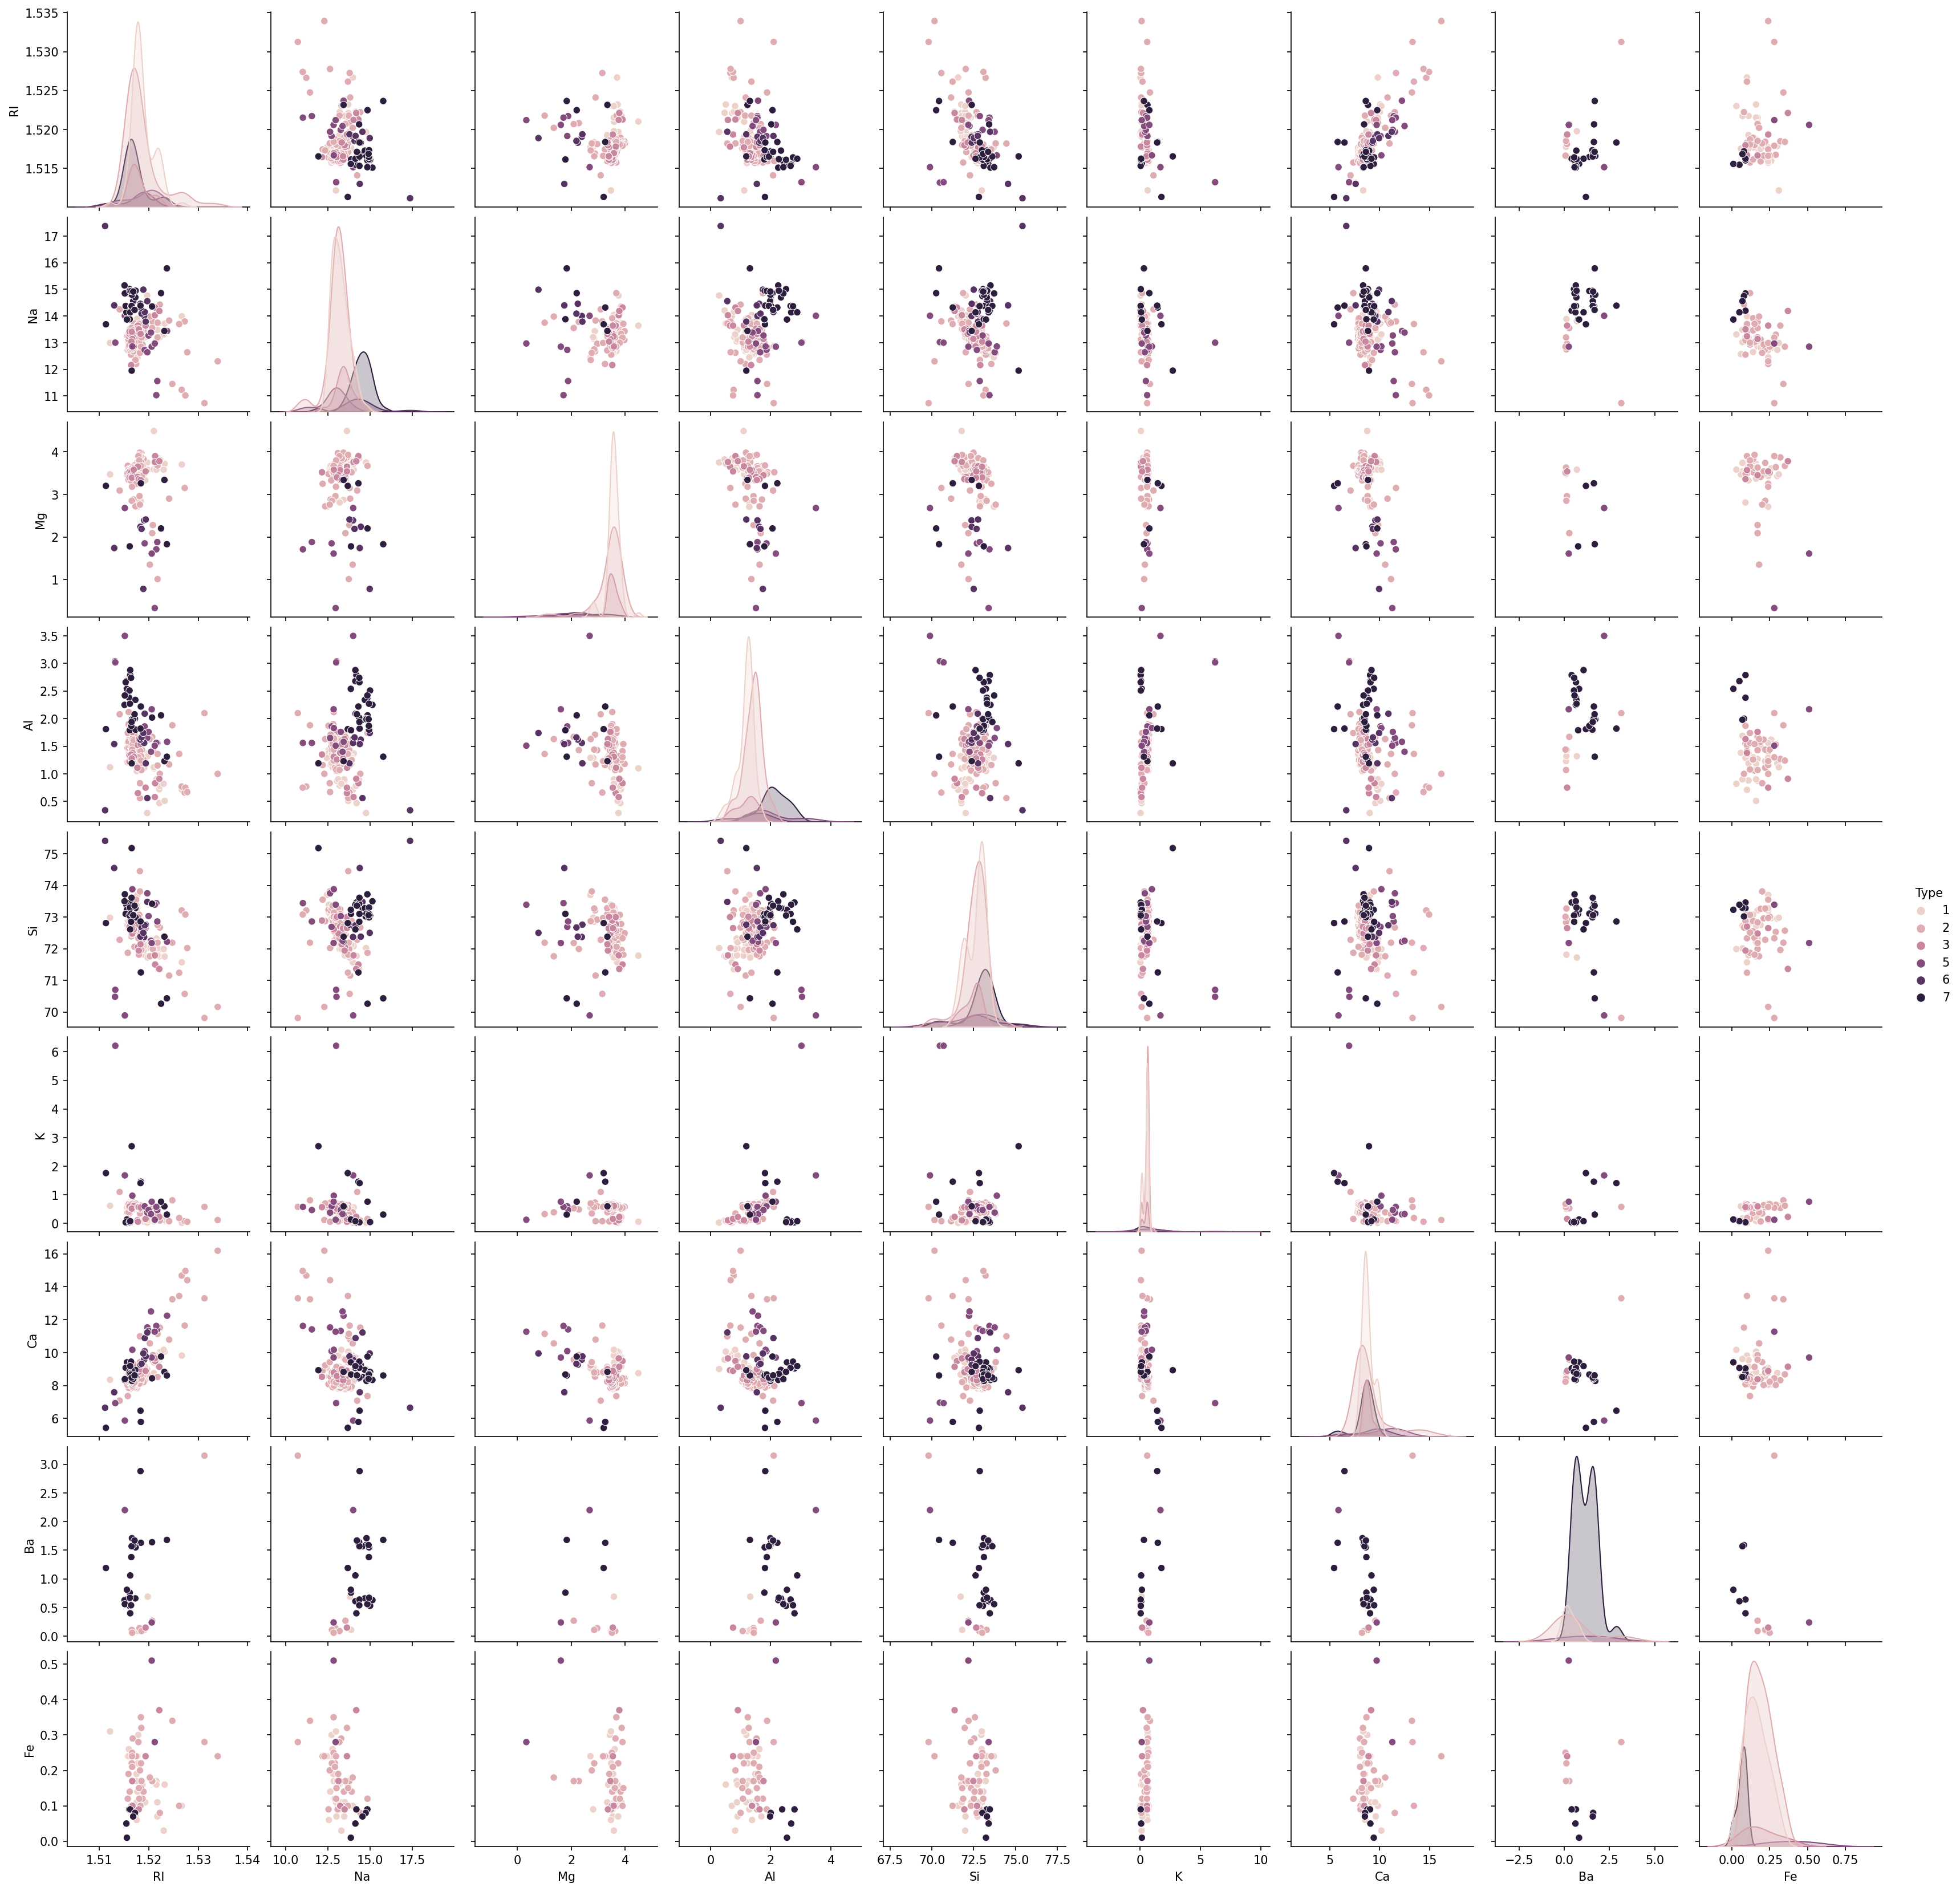

In [7]:
sns.pairplot(glass_data, hue='Type')

<AxesSubplot:>

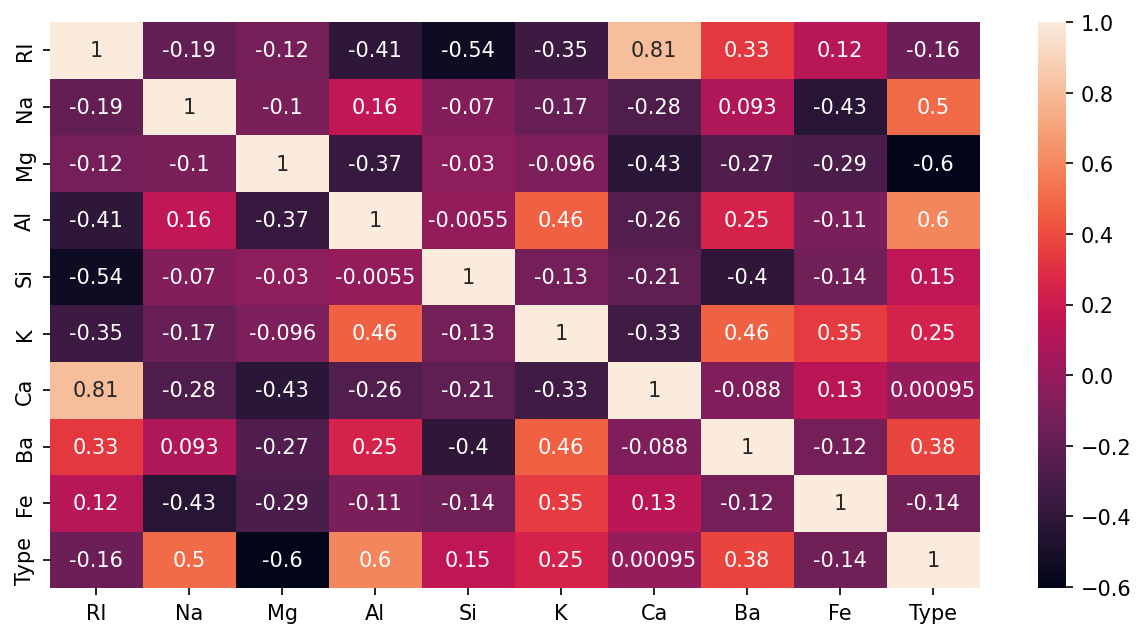

In [8]:
sns.heatmap(glass_data.corr(),annot=True)

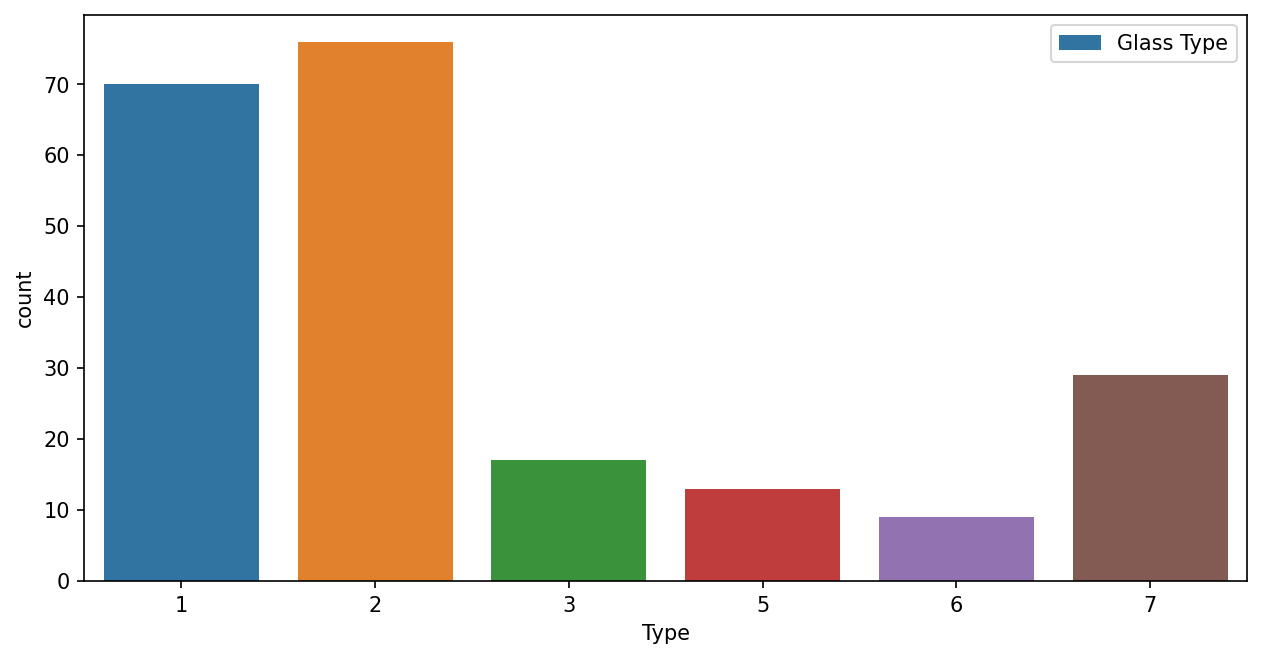

In [11]:
sns.countplot(x = 'Type', data= glass_data, label='Glass Type')
plt.legend()
plt.show()

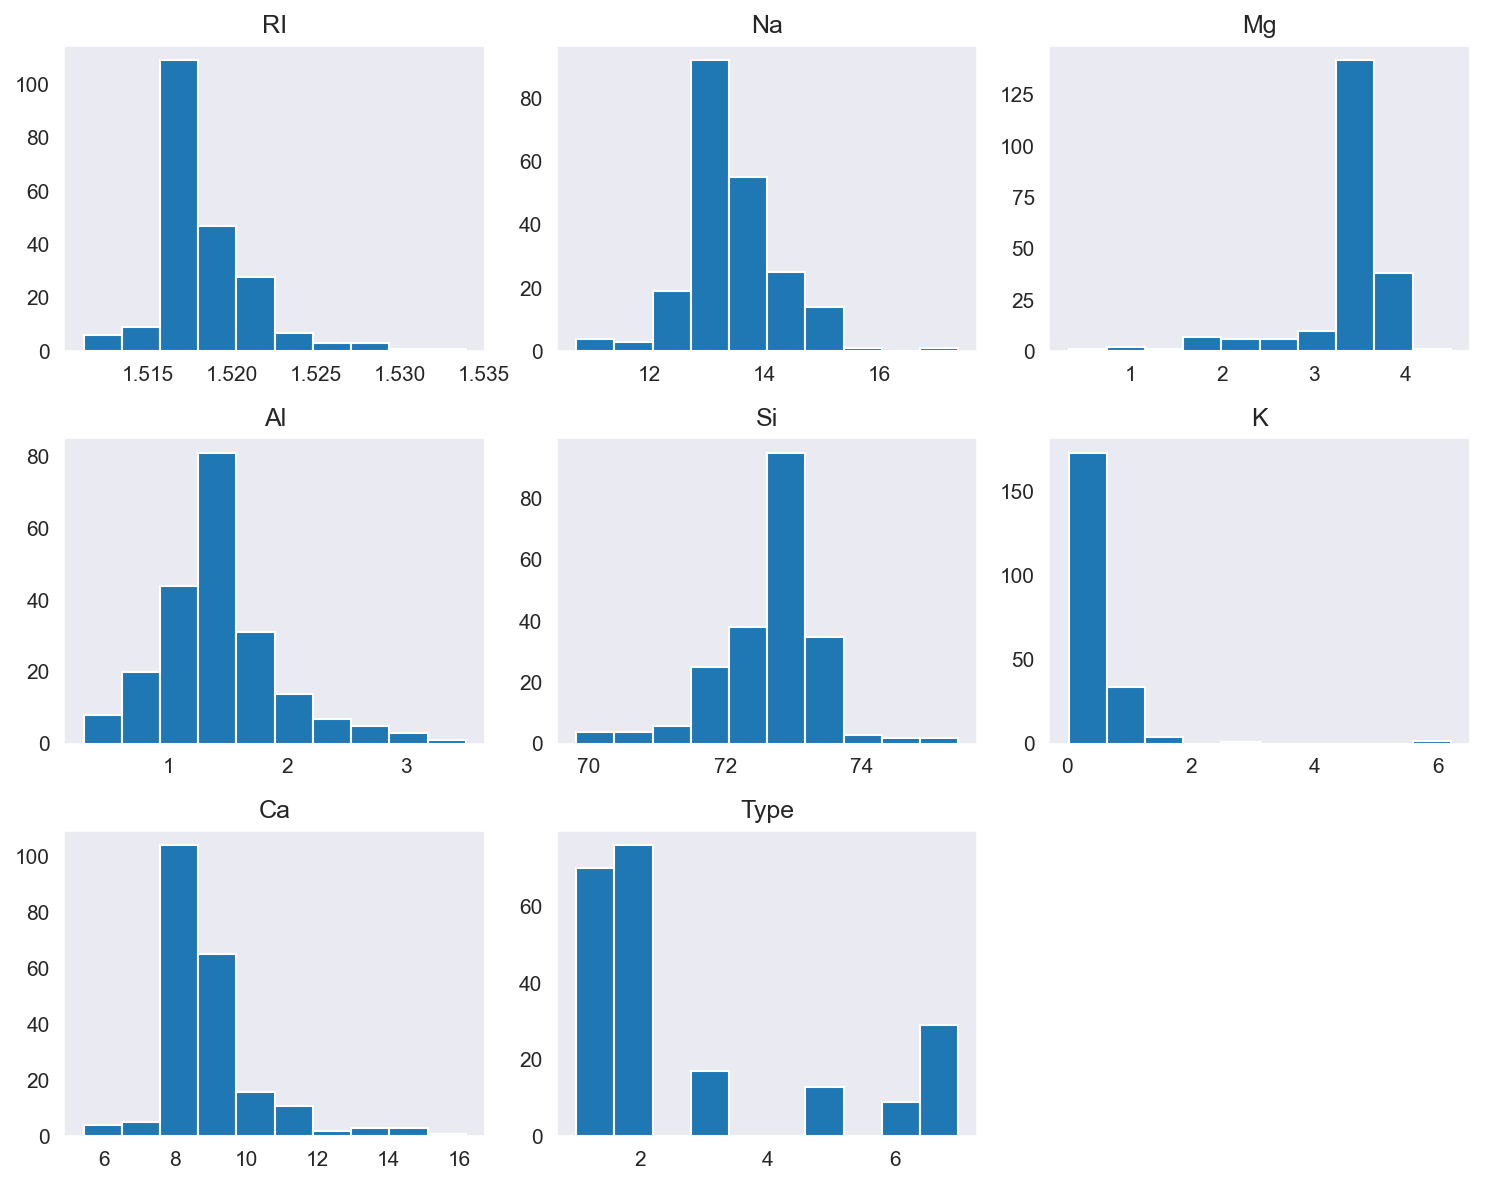

In [119]:
glass_data.hist(grid=False, figsize=(10, 8))
plt.tight_layout()

In [17]:
glass_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      172 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       184 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      38 non-null     float64
 8   Fe      70 non-null     float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [18]:
glass_data.isna().sum()

RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Fe      144
Type      0
dtype: int64

In [19]:
null_values = glass_data.isna().sum()/len(glass_data)*100

In [20]:
null_values

RI       0.000000
Na       0.000000
Mg      19.626168
Al       0.000000
Si       0.000000
K       14.018692
Ca       0.000000
Ba      82.242991
Fe      67.289720
Type     0.000000
dtype: float64

In [21]:
glass_data.drop(['Ba', 'Fe'], axis=1, inplace=True)

In [22]:
glass_data['Mg'].skew()

-2.3542906479866863

In [23]:
glass_data['K'].skew()

6.765075000590123

In [24]:
si = SimpleImputer(strategy='median')

In [25]:
glass_data[['Mg','K']] = si.fit_transform(glass_data[['Mg','K']])

In [26]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Type    0
dtype: int64

In [27]:
glass_data.shape

(214, 8)

In [28]:
glass_data.head()

,RI,Na,Mg,Al,Si,K,Ca,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1


In [30]:
sc = StandardScaler()
X = glass_data.iloc[:,:7]
y = glass_data.iloc[:,-1]

In [31]:
X

,RI,Na,Mg,Al,Si,K,Ca
0,1.52101,13.64,4.490,1.10,71.78,0.06,8.75
1,1.51761,13.89,3.600,1.36,72.73,0.48,7.83
2,1.51618,13.53,3.550,1.54,72.99,0.39,7.78
3,1.51766,13.21,3.690,1.29,72.61,0.57,8.22
4,1.51742,13.27,3.620,1.24,73.08,0.55,8.07
...,...,...,...,...,...,...,...
209,1.51623,14.14,3.535,2.88,72.61,0.08,9.18
210,1.51685,14.92,3.535,1.99,73.06,0.57,8.40
211,1.52065,14.36,3.535,2.02,73.42,0.57,8.44
212,1.51651,14.38,3.535,1.94,73.61,0.57,8.48


In [32]:
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)

In [33]:
X

,RI,Na,Mg,Al,Si,K,Ca
0,0.872868,0.284953,1.974368,-0.692442,-1.127082,-0.835233,-0.145766
1,-0.249333,0.591817,0.393712,-0.170460,0.102319,-0.156658,-0.793734
2,-0.721318,0.149933,0.304911,0.190912,0.438787,-0.302067,-0.828949
3,-0.232831,-0.242853,0.553553,-0.310994,-0.052974,-0.011249,-0.519052
4,-0.312045,-0.169205,0.429232,-0.411375,0.555256,-0.043562,-0.624699
...,...,...,...,...,...,...,...
209,-0.704815,0.898681,0.278271,2.881125,-0.052974,-0.802920,0.157088
210,-0.500178,1.856097,0.278271,1.094342,0.529374,-0.011249,-0.392276
211,0.754046,1.168721,0.278271,1.154570,0.995252,-0.011249,-0.364103
212,-0.612399,1.193270,0.278271,0.993960,1.241133,-0.011249,-0.335931


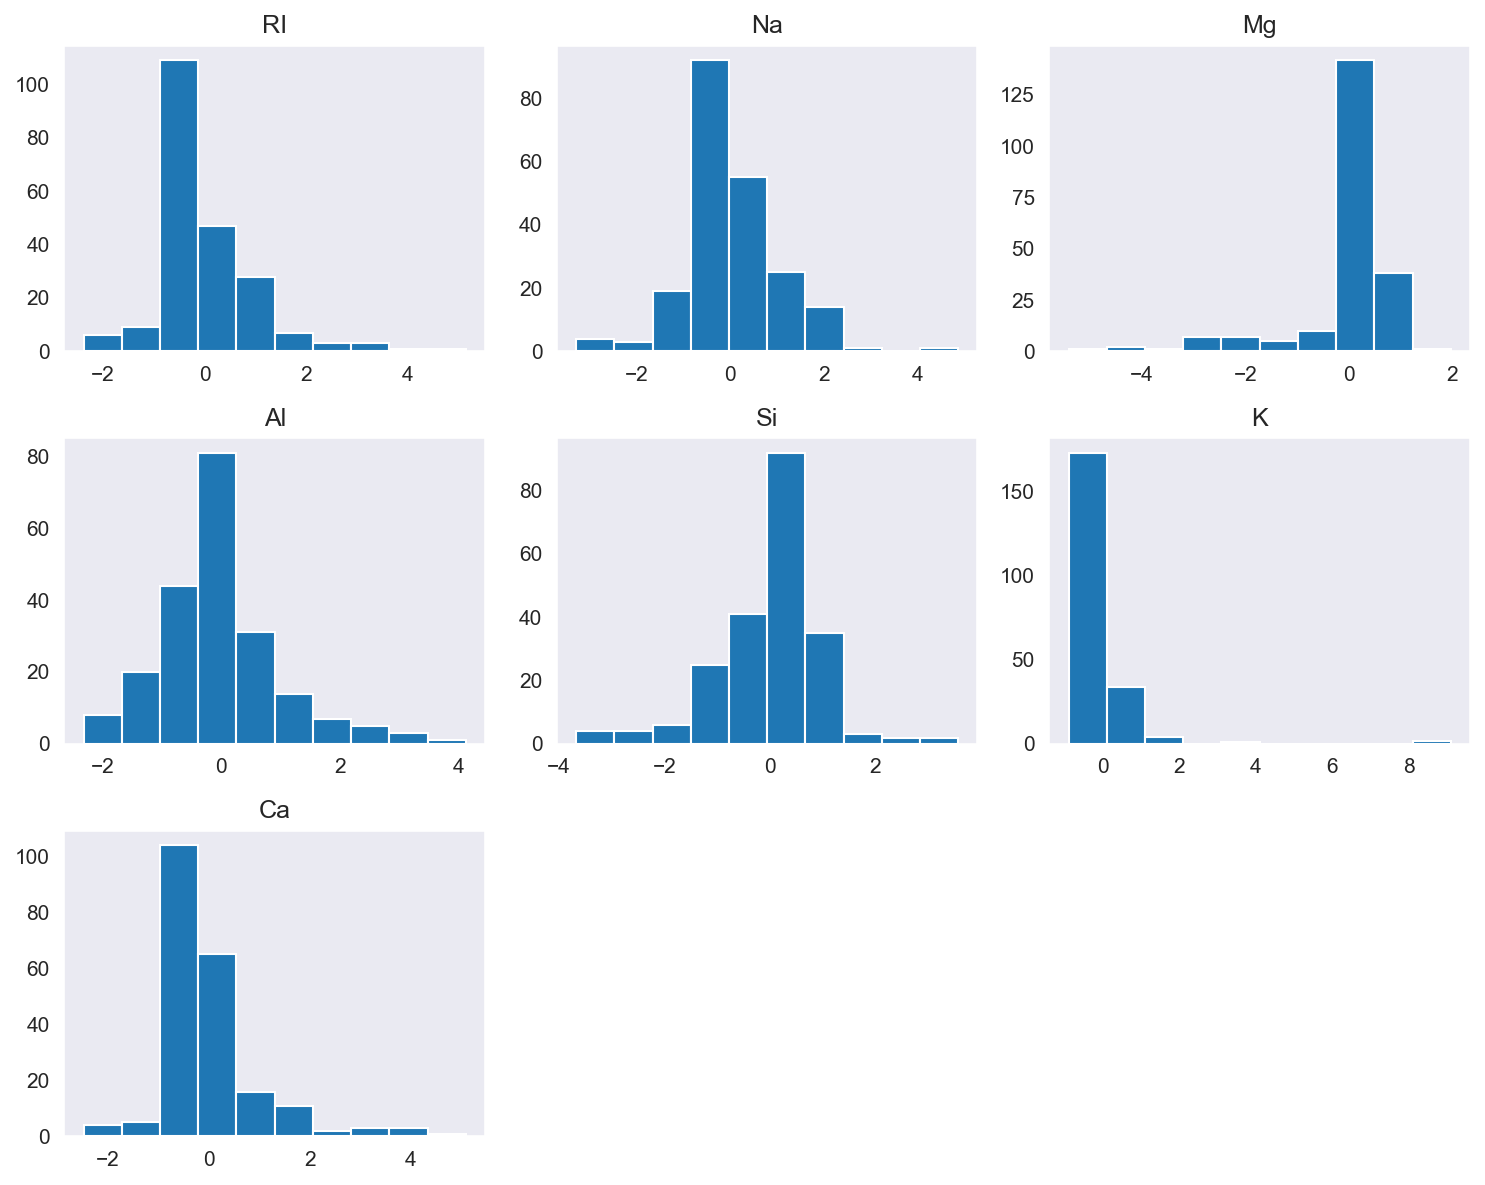

In [118]:
X.hist(grid=False, figsize=(10, 8))
plt.tight_layout()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [35]:
knn = KNeighborsClassifier()

In [36]:
def predict(model):
    model.fit(X_train,y_train)
    ypred = model.predict(X_test)
    
    trainac = model.score(X_train,y_train)
    testac = model.score(X_test,y_test)
    
    print(f"Train AC {trainac}\nTest AC {testac}")

In [37]:
predict(KNeighborsClassifier())

Train AC 0.7625
Test AC 0.7407407407407407


In [38]:
trainac = []
testac = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    ypred = knn.predict(X_test)
    
    trainac.append(knn.score(X_train,y_train))
    testac.append(knn.score(X_test,y_test))

In [39]:
trainac

[1.0,
 0.8875,
 0.8625,
 0.7875,
 0.7625,
 0.73125,
 0.70625,
 0.675,
 0.65,
 0.66875,
 0.65,
 0.6375,
 0.6375,
 0.60625,
 0.625,
 0.6,
 0.60625,
 0.60625,
 0.60625,
 0.60625]

In [40]:
testac

[0.7592592592592593,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7592592592592593,
 0.7592592592592593,
 0.7592592592592593,
 0.7222222222222222,
 0.7222222222222222,
 0.7222222222222222,
 0.7037037037037037,
 0.7407407407407407,
 0.7037037037037037,
 0.6851851851851852,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666]

In [41]:
plt.rcParams['figure.figsize'] = (15,7)

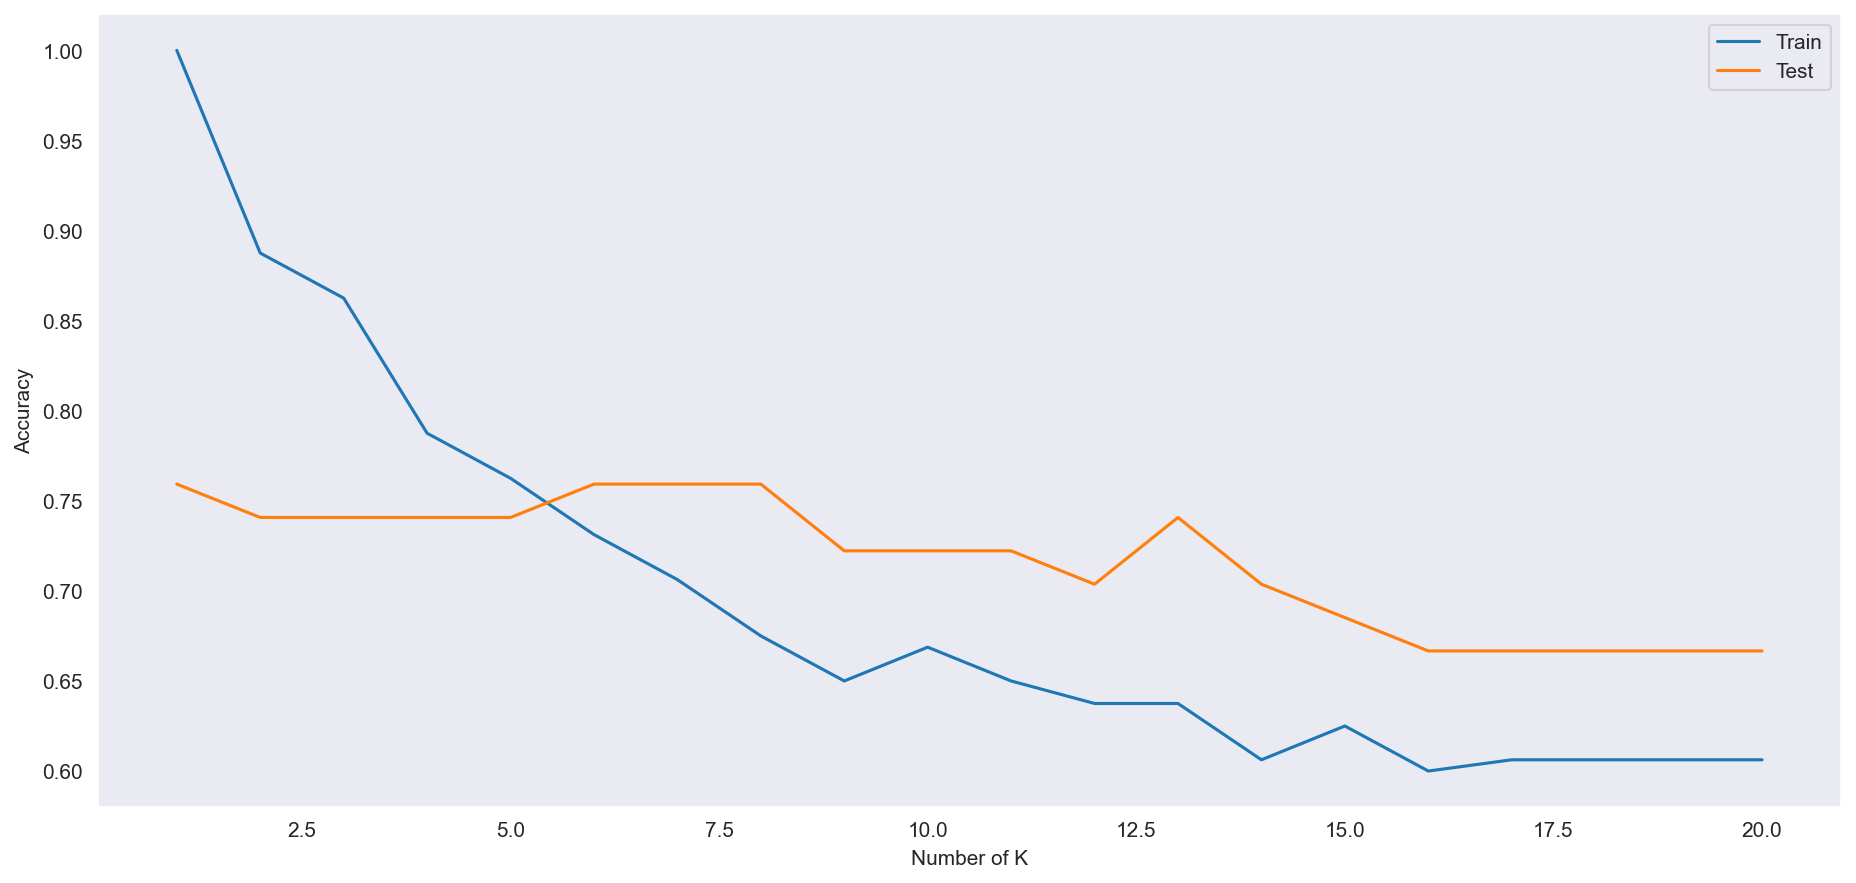

In [42]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainac,label = 'Train')
plt.plot(range(1,21), testac, label = 'Test')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [43]:
predict(KNeighborsClassifier(n_neighbors=3))

Train AC 0.8625
Test AC 0.7407407407407407


In [44]:
n_splits_range = range(2, 21)

mean_scores = []

for n_splits in n_splits_range:
    k_folds = KFold(n_splits=n_splits)
    knn = KNeighborsClassifier(n_neighbors=5)
    scores = cross_val_score(knn, X, y, cv=k_folds)
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)

best_idx = np.argmax(mean_scores)

print("Optimal number of splits:", n_splits_range[best_idx])
print("Mean score with optimal number of splits:", mean_scores[best_idx])

Optimal number of splits: 18
Mean score with optimal number of splits: 0.5963804713804712


In [45]:
param_grid = {'n_neighbors': np.arange(5,21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=18)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
print("Train accuracy:", knn.score(X_train, y_train))
print("Test accuracy:", knn.score(X_test, y_test))

C:\Users\jaevi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=18.
  warnings.warn(


Best parameters: {'n_neighbors': 5}
Best cross-validation score: 0.6589506172839507
Train accuracy: 0.7625
Test accuracy: 0.7407407407407407


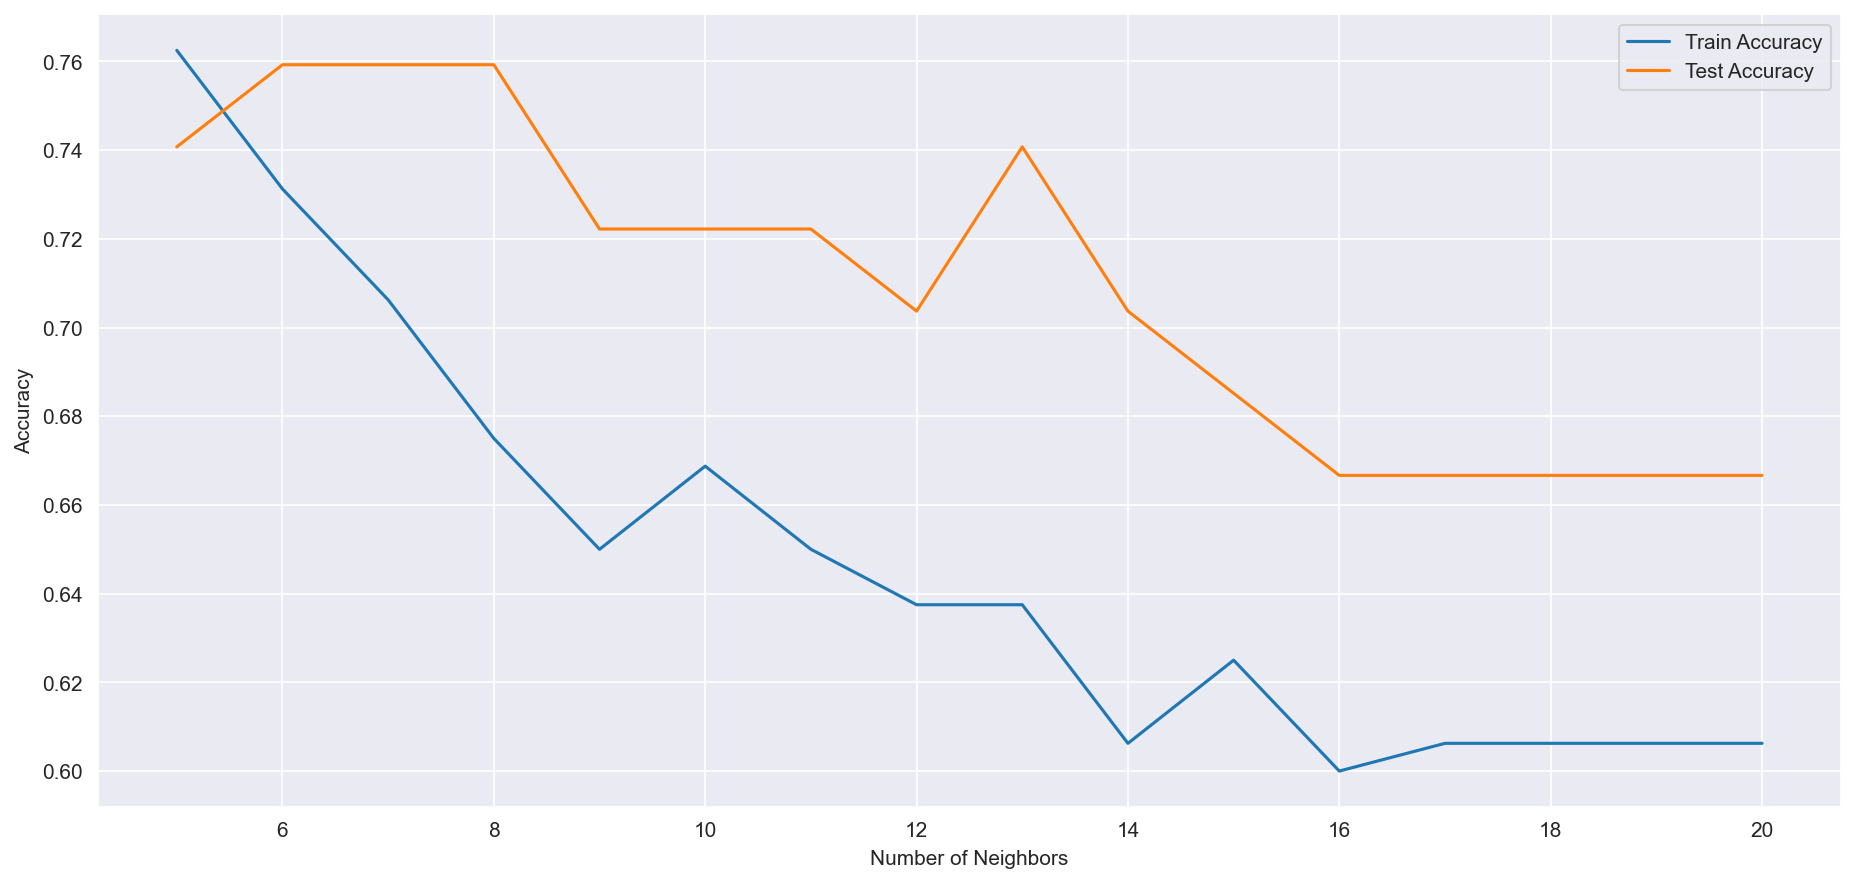

In [46]:
train_acc = []
test_acc = []

for n_neighbors in np.arange(5, 21):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

plt.plot(np.arange(5, 21), train_acc, label="Train Accuracy")
plt.plot(np.arange(5, 21), test_acc, label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Implement a KNN model to classify the animals in to categorie

In [101]:
animals = pd.read_csv('Zoo.csv')

In [48]:
animals

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [68]:
animals.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [50]:
animals.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

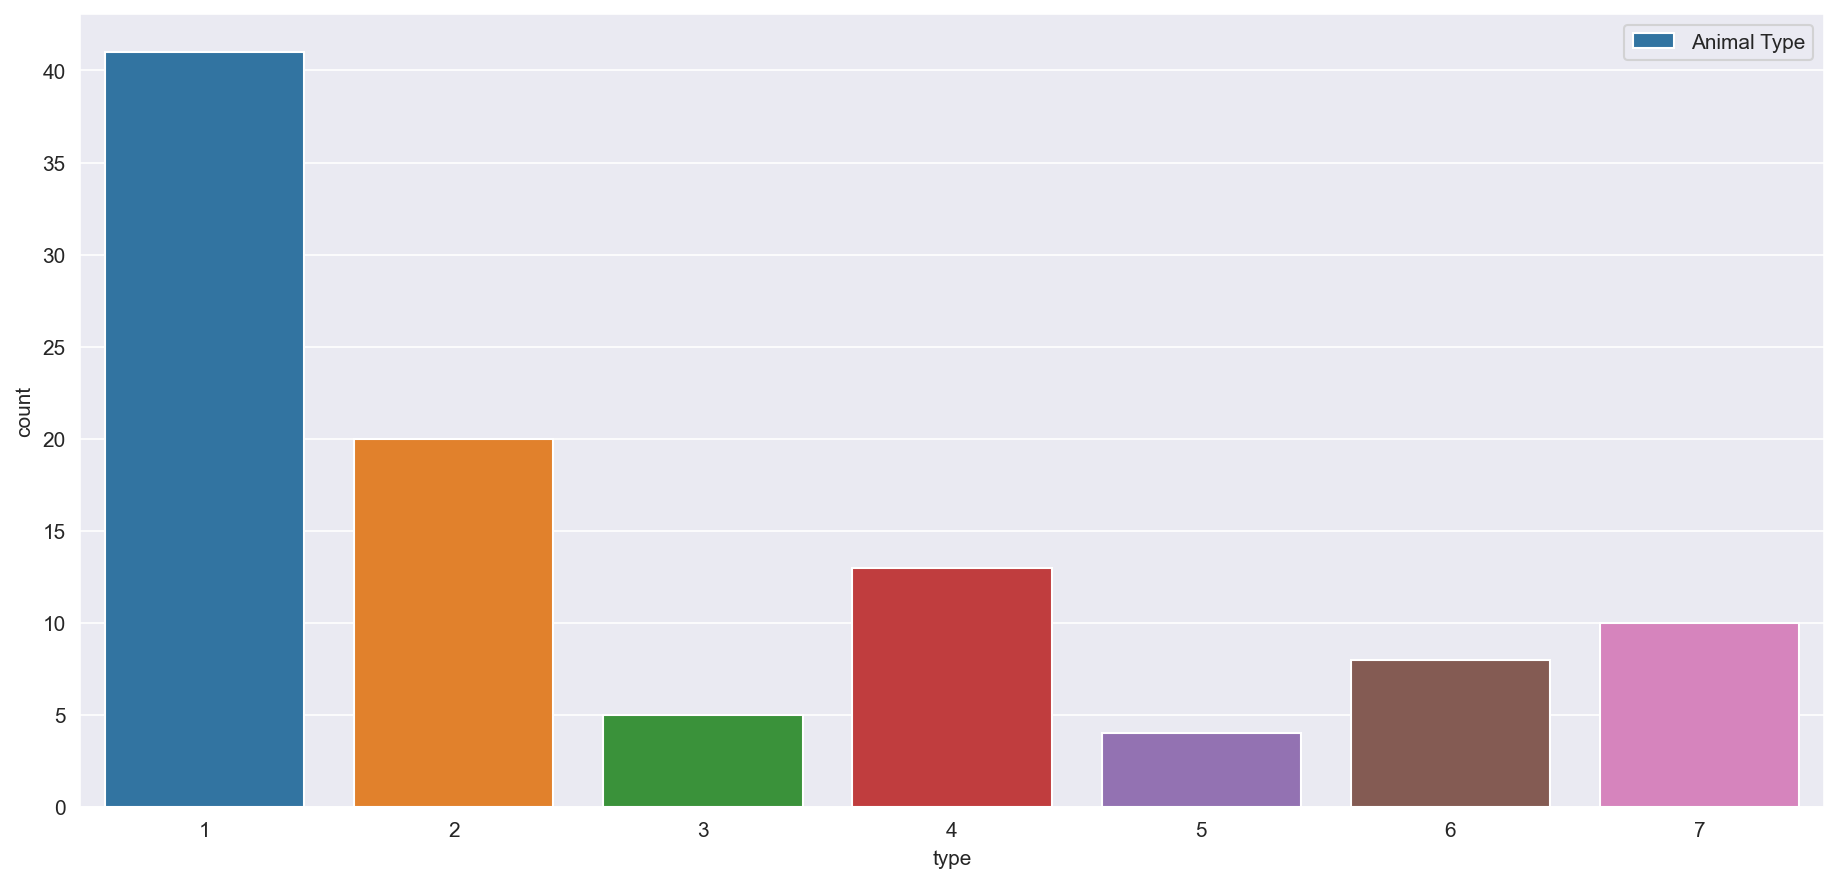

In [77]:
sns.countplot(x = 'type', data= animals, label='Animal Type')
plt.legend()
plt.show()

<AxesSubplot:>

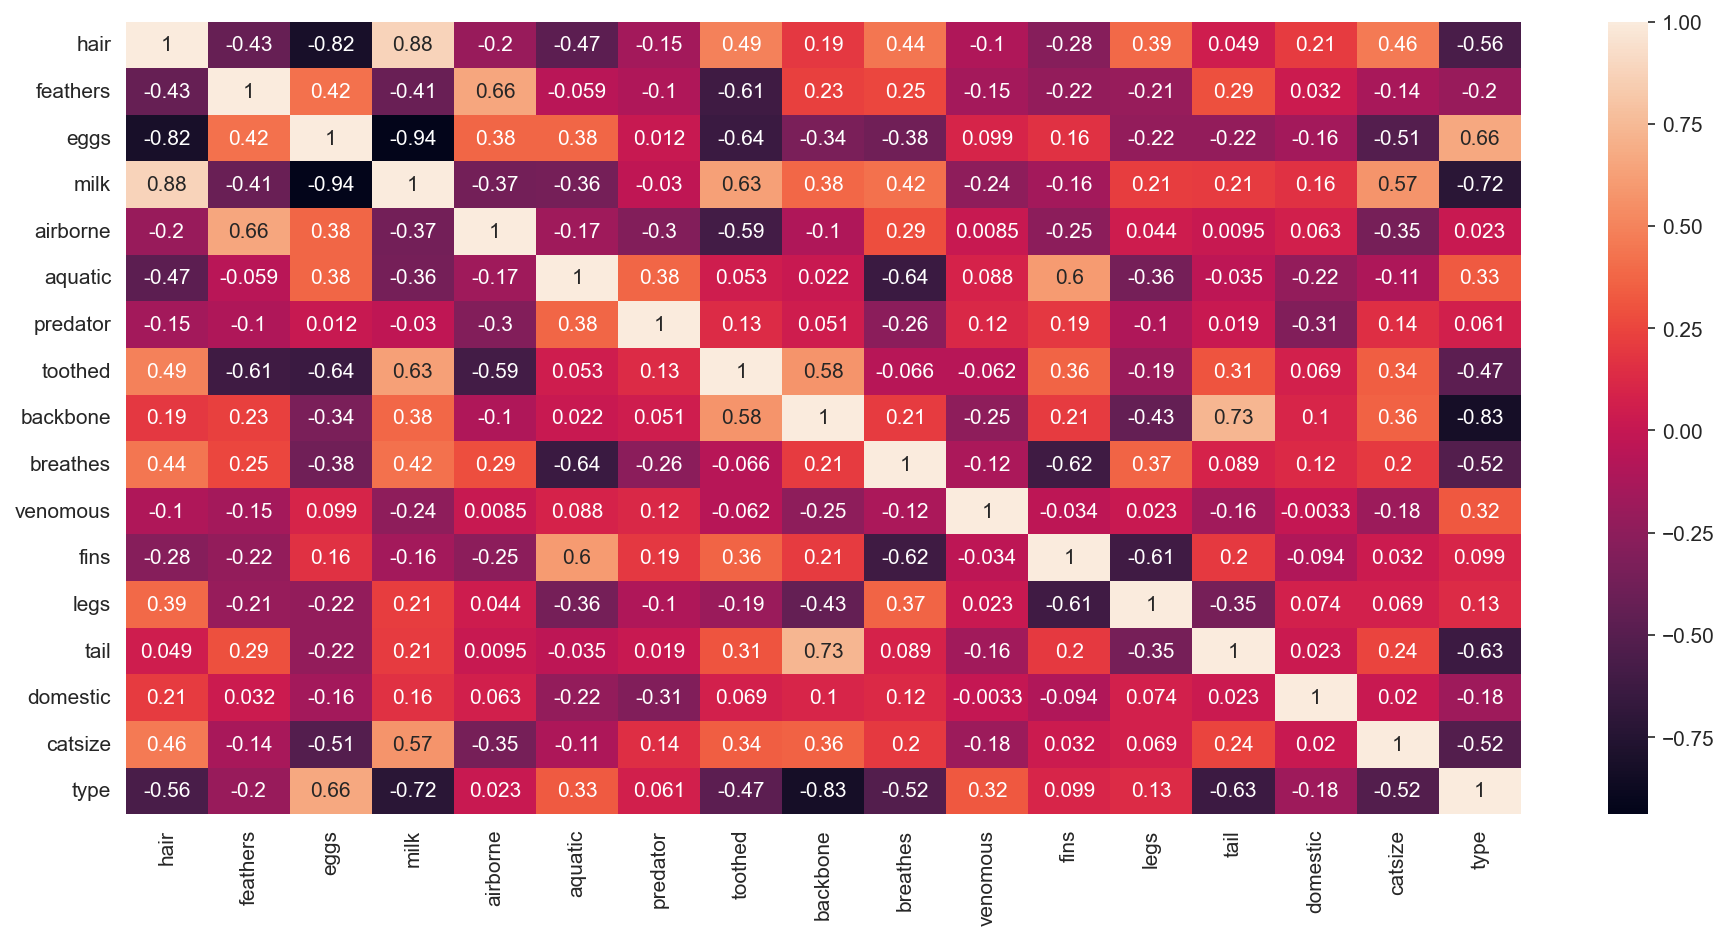

In [51]:
sns.heatmap(animals.corr(),annot=True)

In [102]:
sc = StandardScaler()
x1 = animals.iloc[:,1:16]
y1= animals.iloc[:,-1]

In [103]:
x1

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [104]:
y1

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [105]:
x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)

In [106]:
x_train, x_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.3, random_state=1)

In [107]:
knn = KNeighborsClassifier()

In [108]:
def predict(model):
    model.fit(x_train,y1_train)
    ypred = model.predict(x_test)
    
    trainaccuracy = model.score(x_train,y1_train)
    testaccuracy = model.score(x_test,y1_test)
    
    print(f"Train AC {trainaccuracy}\nTest AC {testaccuracy}")

In [109]:
predict(KNeighborsClassifier())

Train AC 0.9285714285714286
Test AC 0.9354838709677419


In [110]:
trainaccuracy = []
testaccuracy = []

for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y1_train)
    ypred = knn.predict(x_test)
    
    trainaccuracy.append(knn.score(x_train,y1_train))
    testaccuracy.append(knn.score(x_test,y1_test))

In [111]:
trainaccuracy

[1.0,
 0.9285714285714286,
 0.9714285714285714,
 0.9428571428571428,
 0.9285714285714286,
 0.9285714285714286,
 0.9142857142857143,
 0.9,
 0.8857142857142857,
 0.8714285714285714,
 0.8571428571428571,
 0.8428571428571429,
 0.8428571428571429,
 0.8142857142857143,
 0.8428571428571429,
 0.8571428571428571,
 0.8571428571428571,
 0.8428571428571429,
 0.8142857142857143,
 0.8]

In [112]:
testaccuracy

[0.967741935483871,
 0.9032258064516129,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.9354838709677419,
 0.8709677419354839,
 0.8709677419354839,
 0.8387096774193549,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.8709677419354839,
 0.9032258064516129,
 0.9032258064516129,
 0.9032258064516129,
 0.8709677419354839,
 0.8387096774193549]

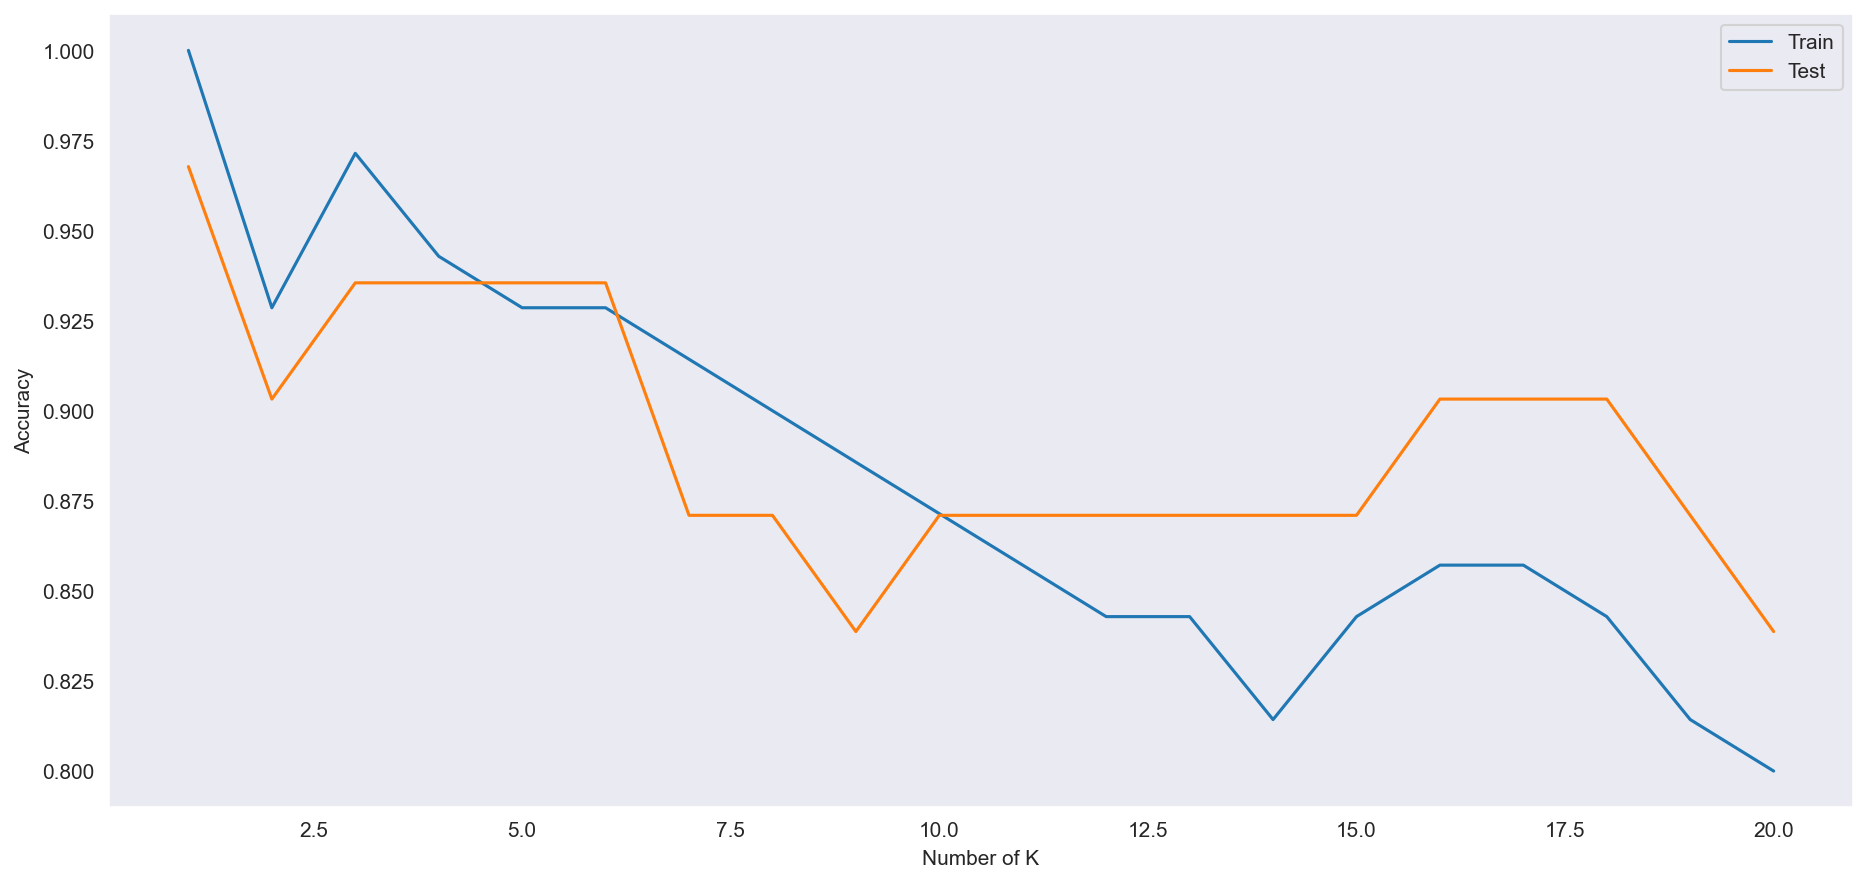

In [113]:
sns.set_style('darkgrid')

plt.plot(range(1,21),trainaccuracy,label = 'Train')
plt.plot(range(1,21), testaccuracy, label = 'Test')
plt.xlabel('Number of K')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

In [114]:
predict(KNeighborsClassifier(n_neighbors=4))

Train AC 0.9428571428571428
Test AC 0.9354838709677419


In [115]:
n_splits_range = range(2, 21)

mean_scores = []

for n_splits in n_splits_range:
    k_folds = KFold(n_splits=n_splits)
    knn = KNeighborsClassifier(n_neighbors=4)
    scores = cross_val_score(knn, x1, y1, cv=k_folds)
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)

best_idx = np.argmax(mean_scores)

print("Optimal number of splits:", n_splits_range[best_idx])
print("Mean score with optimal number of splits:", mean_scores[best_idx])

Optimal number of splits: 10
Mean score with optimal number of splits: 0.9200000000000002


In [116]:
param_grid = {'n_neighbors': np.arange(2, 21)}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=10)
grid_search.fit(x_train, y1_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
knn.fit(x_train, y1_train)
print("Train accuracy:", knn.score(x_train, y1_train))
print("Test accuracy:", knn.score(x_test, y1_test))

C:\Users\jaevi\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


Best parameters: {'n_neighbors': 3}
Best cross-validation score: 0.9285714285714286
Train accuracy: 0.9714285714285714
Test accuracy: 0.9354838709677419


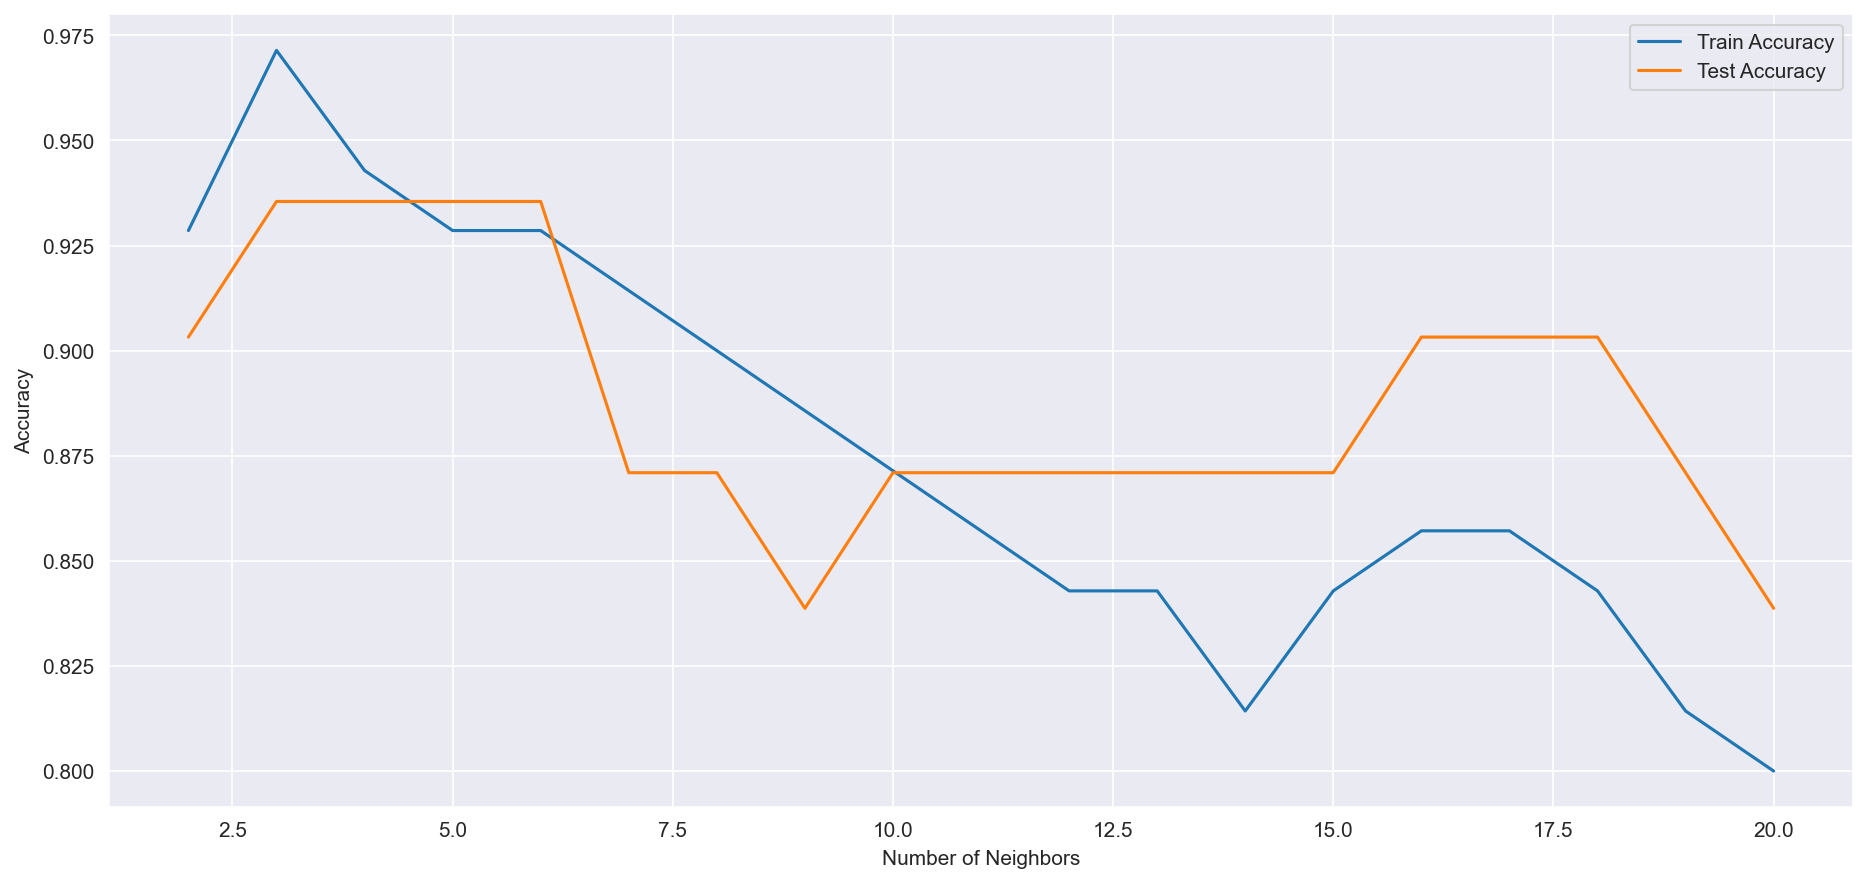

In [117]:
Train_acc = []
Test_acc = []

for n_neighbors in np.arange(2, 21):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train, y1_train)
    
    Train_acc.append(knn.score(x_train, y1_train))
    Test_acc.append(knn.score(x_test, y1_test))

plt.plot(np.arange(2, 21), Train_acc, label="Train Accuracy")
plt.plot(np.arange(2, 21), Test_acc, label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()